In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
import pickle

In [2]:
TRAIN_DIR = "datasets/seg_train"
VALIDATION_DIR = "datasets/seg_test"

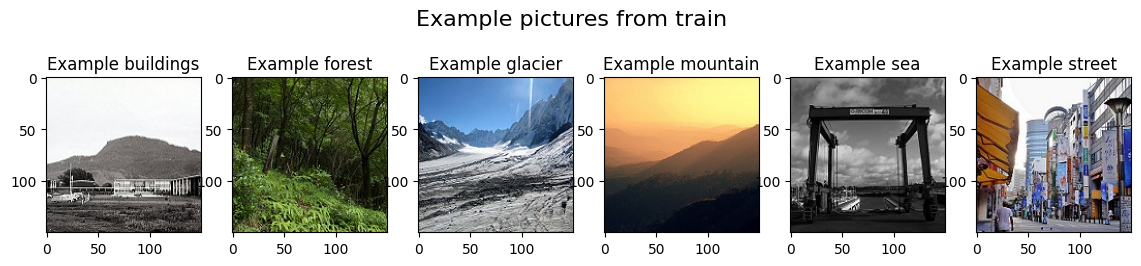

In [3]:
fig, axes = plt.subplots(1, 6, figsize=(14, 3))
fig.suptitle('Example pictures from train', fontsize=16)


for ii, pictures in enumerate(['buildings' , 'forest', 'glacier', 'mountain', 'sea', 'street']):
    dir = f'datasets/seg_train/{pictures}'
    img = tf.keras.preprocessing.image.load_img(dir+'/'+os.listdir(dir)[0])
    axes[ii].imshow(img)
    axes[ii].set_title(f'Example {pictures}')

In [4]:
sample_array = tf.keras.preprocessing.image.img_to_array(img)

print(f"Each image has shape: {sample_array.shape}")

Each image has shape: (150, 150, 3)


In [5]:
sample_array[0,:5]

array([[ 21.,   7.,   4.],
       [ 62.,  47.,  40.],
       [149., 131., 117.],
       [140., 123., 107.],
       [136., 120., 107.]], dtype=float32)

In [6]:
def train_val_datasets():
    """Create train and validation datasets

    Returns:
        (tf.data.Dataset, tf.data.Dataset): train and validation datasets
    """

    train_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=TRAIN_DIR,
        batch_size=16,
        image_size=(150,150),
        color_mode="rgb",
        shuffle=True
    )

    validation_dataset = tf.keras.utils.image_dataset_from_directory(
        directory=VALIDATION_DIR,
        batch_size=16,
        image_size=(150,150),
        color_mode="rgb",
        shuffle=True
    )

    return train_dataset, validation_dataset

In [7]:
train_dataset, validation_dataset = train_val_datasets()

print(f"Images of train dataset have shape: {train_dataset.element_spec[0].shape}")
print(f"Labels of train dataset have shape: {train_dataset.element_spec[1].shape}")
print(f"Images of validation dataset have shape: {validation_dataset.element_spec[0].shape}")
print(f"Label of validation dataset have shape: {validation_dataset.element_spec[1].shape}")

Found 14034 files belonging to 6 classes.
Found 3000 files belonging to 6 classes.
Images of train dataset have shape: (None, 150, 150, 3)
Labels of train dataset have shape: (None,)
Images of validation dataset have shape: (None, 150, 150, 3)
Label of validation dataset have shape: (None,)


In [8]:
def creat_model():
    """Create the classifier model

    Returns:
        tf.keras.model.Sequential: CNN for multi-class classification
    """

    model = tf.keras.models.Sequential([
        tf.keras.layers.InputLayer(input_shape=(150,150,3)),
        tf.keras.layers.Rescaling(1./255.),
        tf.keras.layers.Conv2D(32, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation="relu"),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(64, activation="relu"),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dense(6, activation="softmax")
    ])

    model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0001),
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    
    return model

In [9]:
model = creat_model()

c:\Users\MEHMET\Desktop\intel\venv\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


In [10]:
print(f'Input shape: {model.input_shape}')
print(f'Output shape: {model.output_shape}')

Input shape: (None, 150, 150, 3)
Output shape: (None, 6)


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 256)    │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,573,318 (6.00 MB)

 Trainable params: 1,573,318 (6.00 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
history = model.fit(train_dataset,
                    epochs=15,
                    validation_data=validation_dataset)

Epoch 1/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 103s 116ms/step - accuracy: 0.4238 - loss: 1.3954 - val_accuracy: 0.5733 - val_loss: 1.0782
Epoch 2/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 99s 113ms/step - accuracy: 0.6222 - loss: 0.9764 - val_accuracy: 0.5820 - val_loss: 1.1740
Epoch 3/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 96s 110ms/step - accuracy: 0.6937 - loss: 0.8119 - val_accuracy: 0.6990 - val_loss: 0.8270
Epoch 4/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 91s 104ms/step - accuracy: 0.7416 - loss: 0.6993 - val_accuracy: 0.7560 - val_loss: 0.6701
Epoch 5/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 96s 109ms/step - accuracy: 0.7708 - loss: 0.6239 - val_accuracy: 0.7780 - val_loss: 0.6343
Epoch 6/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 92s 104ms/step - accuracy: 0.7935 - loss: 0.5608 - val_accuracy: 0.7933 - val_loss: 0.5821
Epoch 7/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 92s 105ms/step - accuracy: 0.8156 - loss: 0.5211 - val_accuracy: 0.8047 - val_loss: 0.5572
Epoch 8/15
878/878 ━━━━━━━━━━━━━━━━━━━━ 92s 105ms/step - accuracy: 0.8296 - loss: 

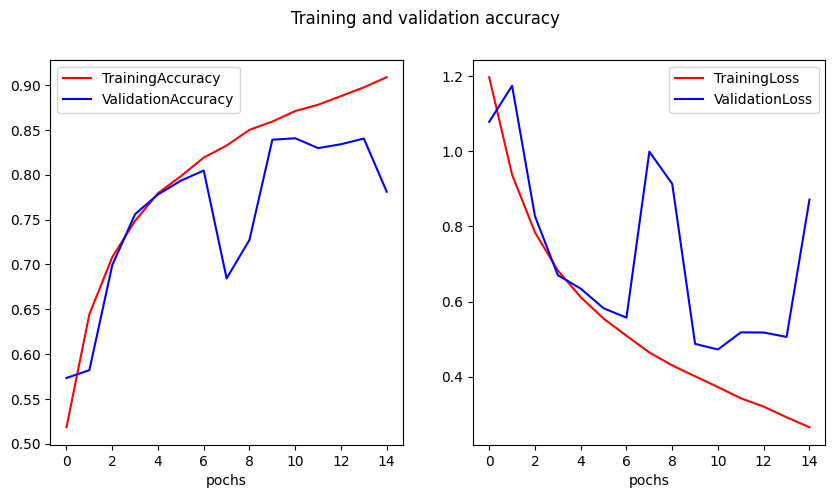

In [13]:
acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(len(acc))

fig, ax = plt.subplots(1,2, figsize=(10,5))
fig.suptitle("Training and validation accuracy")

for i, (data, label) in enumerate(zip([(acc, val_acc) , (loss, val_loss)], ["Accuracy","Loss"])):
    ax[i].plot(epochs, data[0], "r", label="Training" + label)
    ax[i].plot(epochs, data[1], "b", label="Validation" + label)
    ax[i].legend()
    ax[i].set_xlabel("pochs")

plt.show()

In [14]:
model.save("cnn_model.h5")